In [53]:
import skimage as sk
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from n2v.models import N2V
from matplotlib.image import imread, imsave
from copy import copy

In [54]:
model_name = 'n2v_test_black_line_2d'
basedir = 'models_test'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [55]:
image = imread('./../domes/2d_black_line_test/99-train.tif')

# Here we process the image.
pred_image = model.predict(image, axes='YX')

The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 2s 2s/step


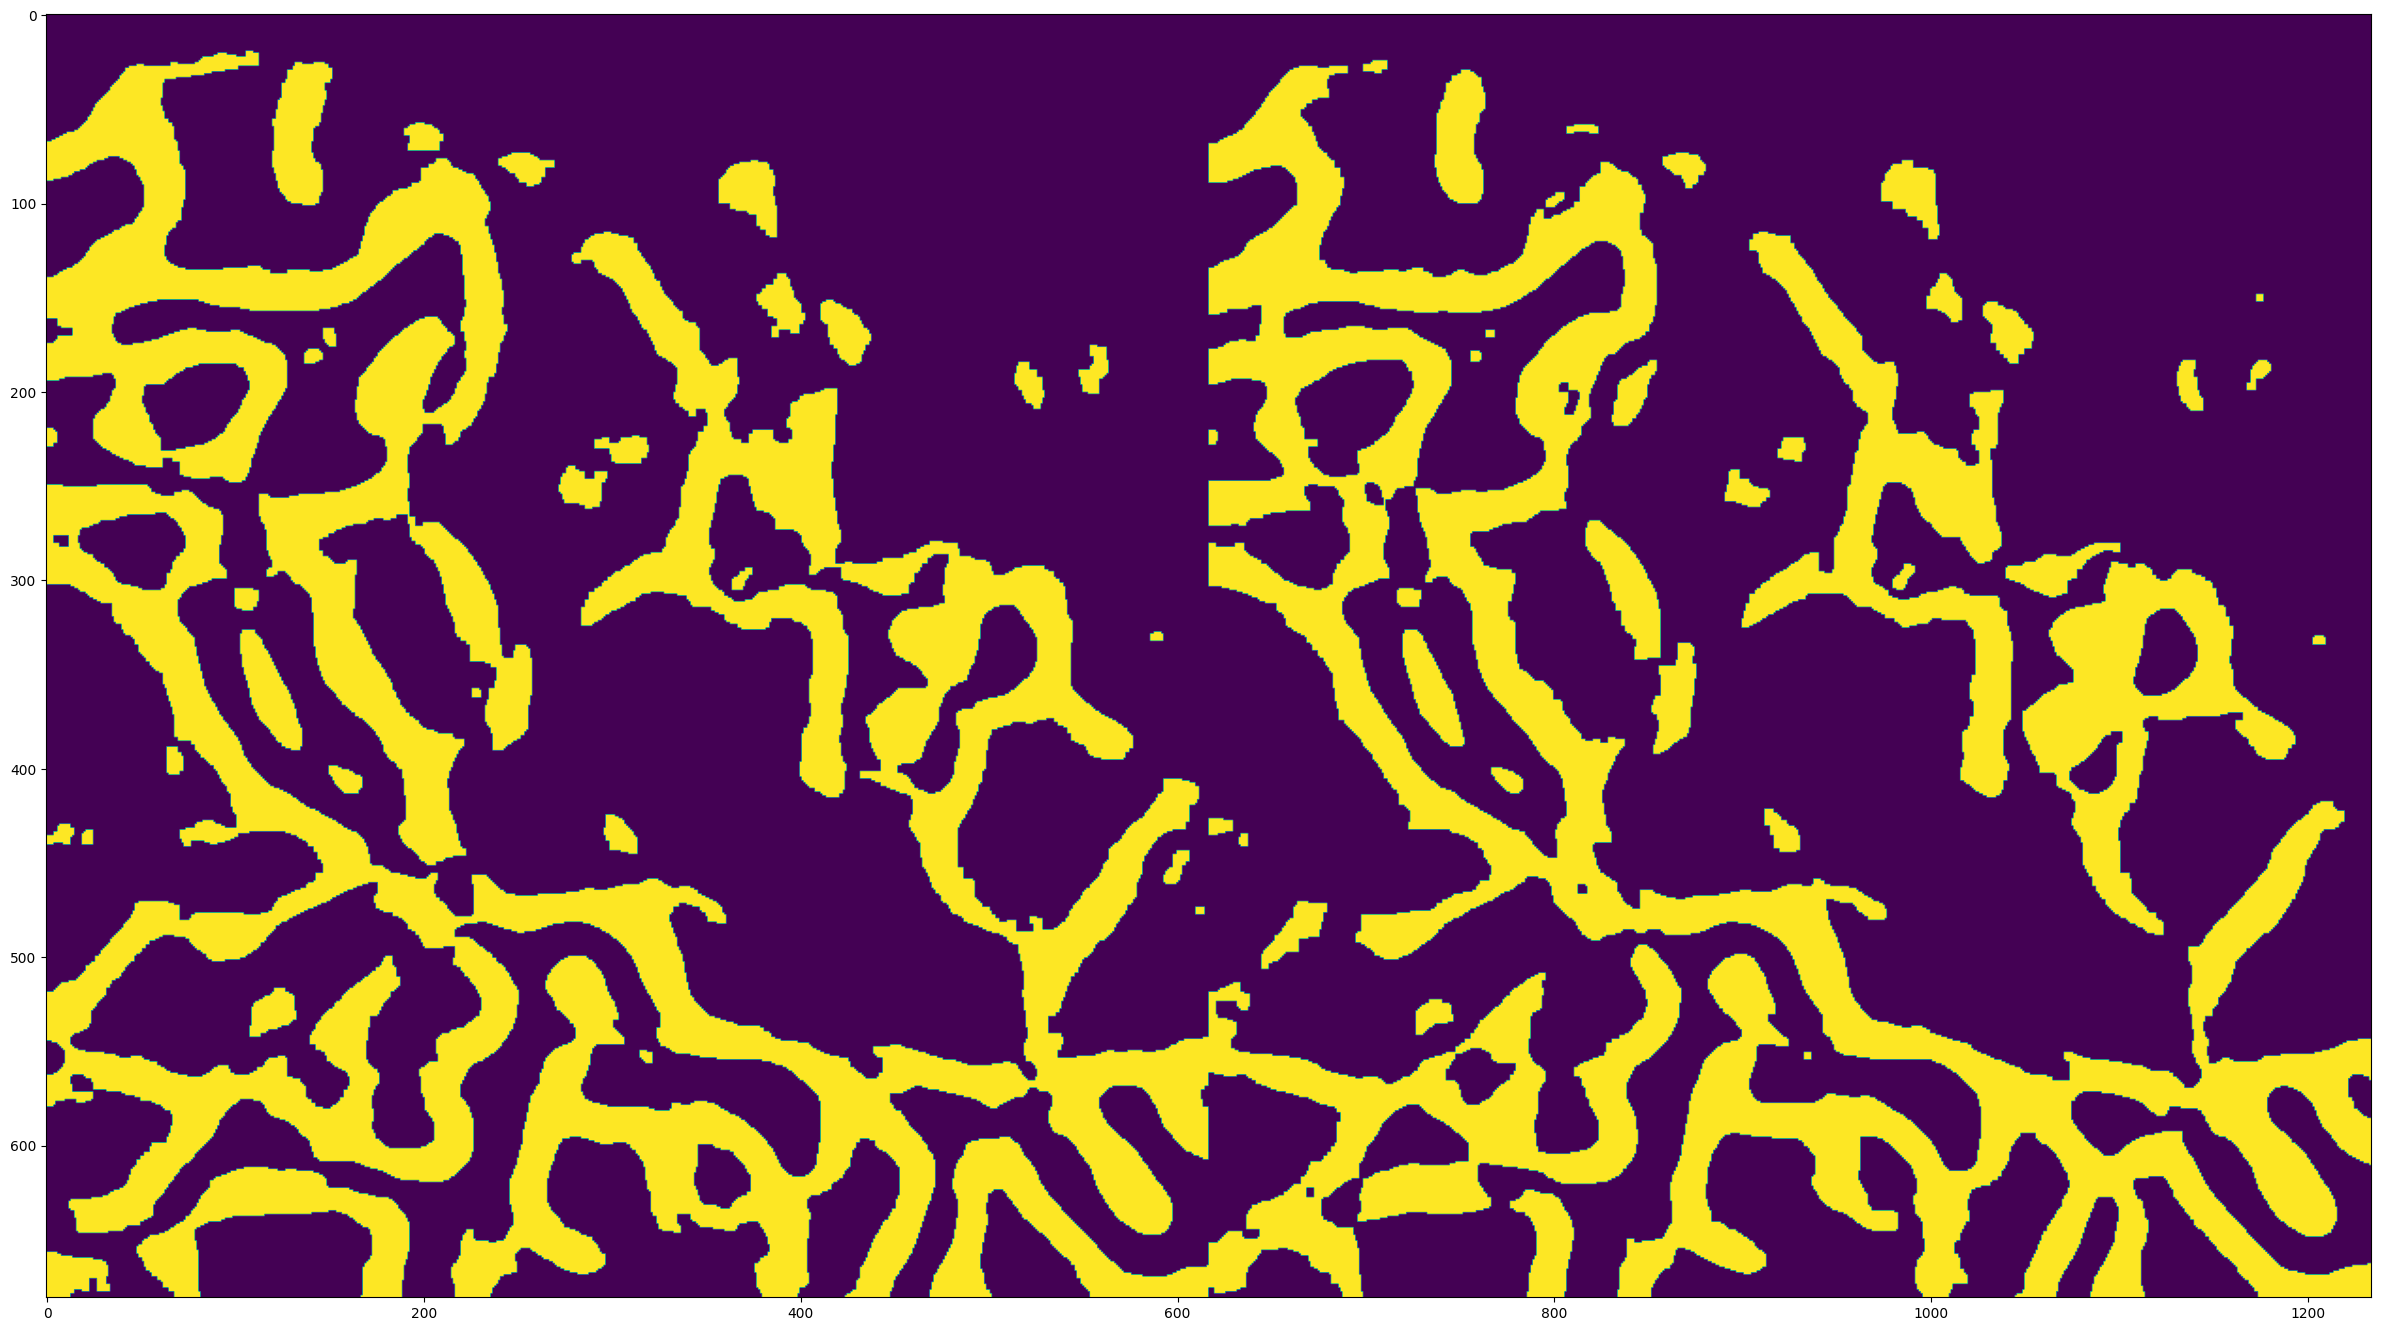

In [64]:
kernel = np.ones((4,4), np.uint8)

img = image.astype(np.uint8)
gaussian_img = gaussian_filter(img, sigma=1)
median_img = sk.filters.rank.median(gaussian_img, sk.morphology.star(12))
# median = median.astype(np.uint8)
th3_img = cv.adaptiveThreshold(median_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_img = cv.morphologyEx(th3_img, cv.MORPH_OPEN, kernel=kernel)
th3_img = cv.morphologyEx(th3_img, cv.MORPH_CLOSE, kernel=kernel)

pred = pred_image.astype(np.uint8)
gaussian_pred = gaussian_filter(pred, sigma=1)
median_pred = sk.filters.rank.median(gaussian_pred, sk.morphology.star(12))
# median = median.astype(np.uint8)
th3_pred = cv.adaptiveThreshold(median_pred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_pred = cv.morphologyEx(th3_pred, cv.MORPH_OPEN, kernel=kernel)
th3_pred = cv.morphologyEx(th3_pred, cv.MORPH_CLOSE, kernel=kernel)

plt.figure(figsize=(30,30))
plt.imshow(np.hstack((th3_img, th3_pred)))

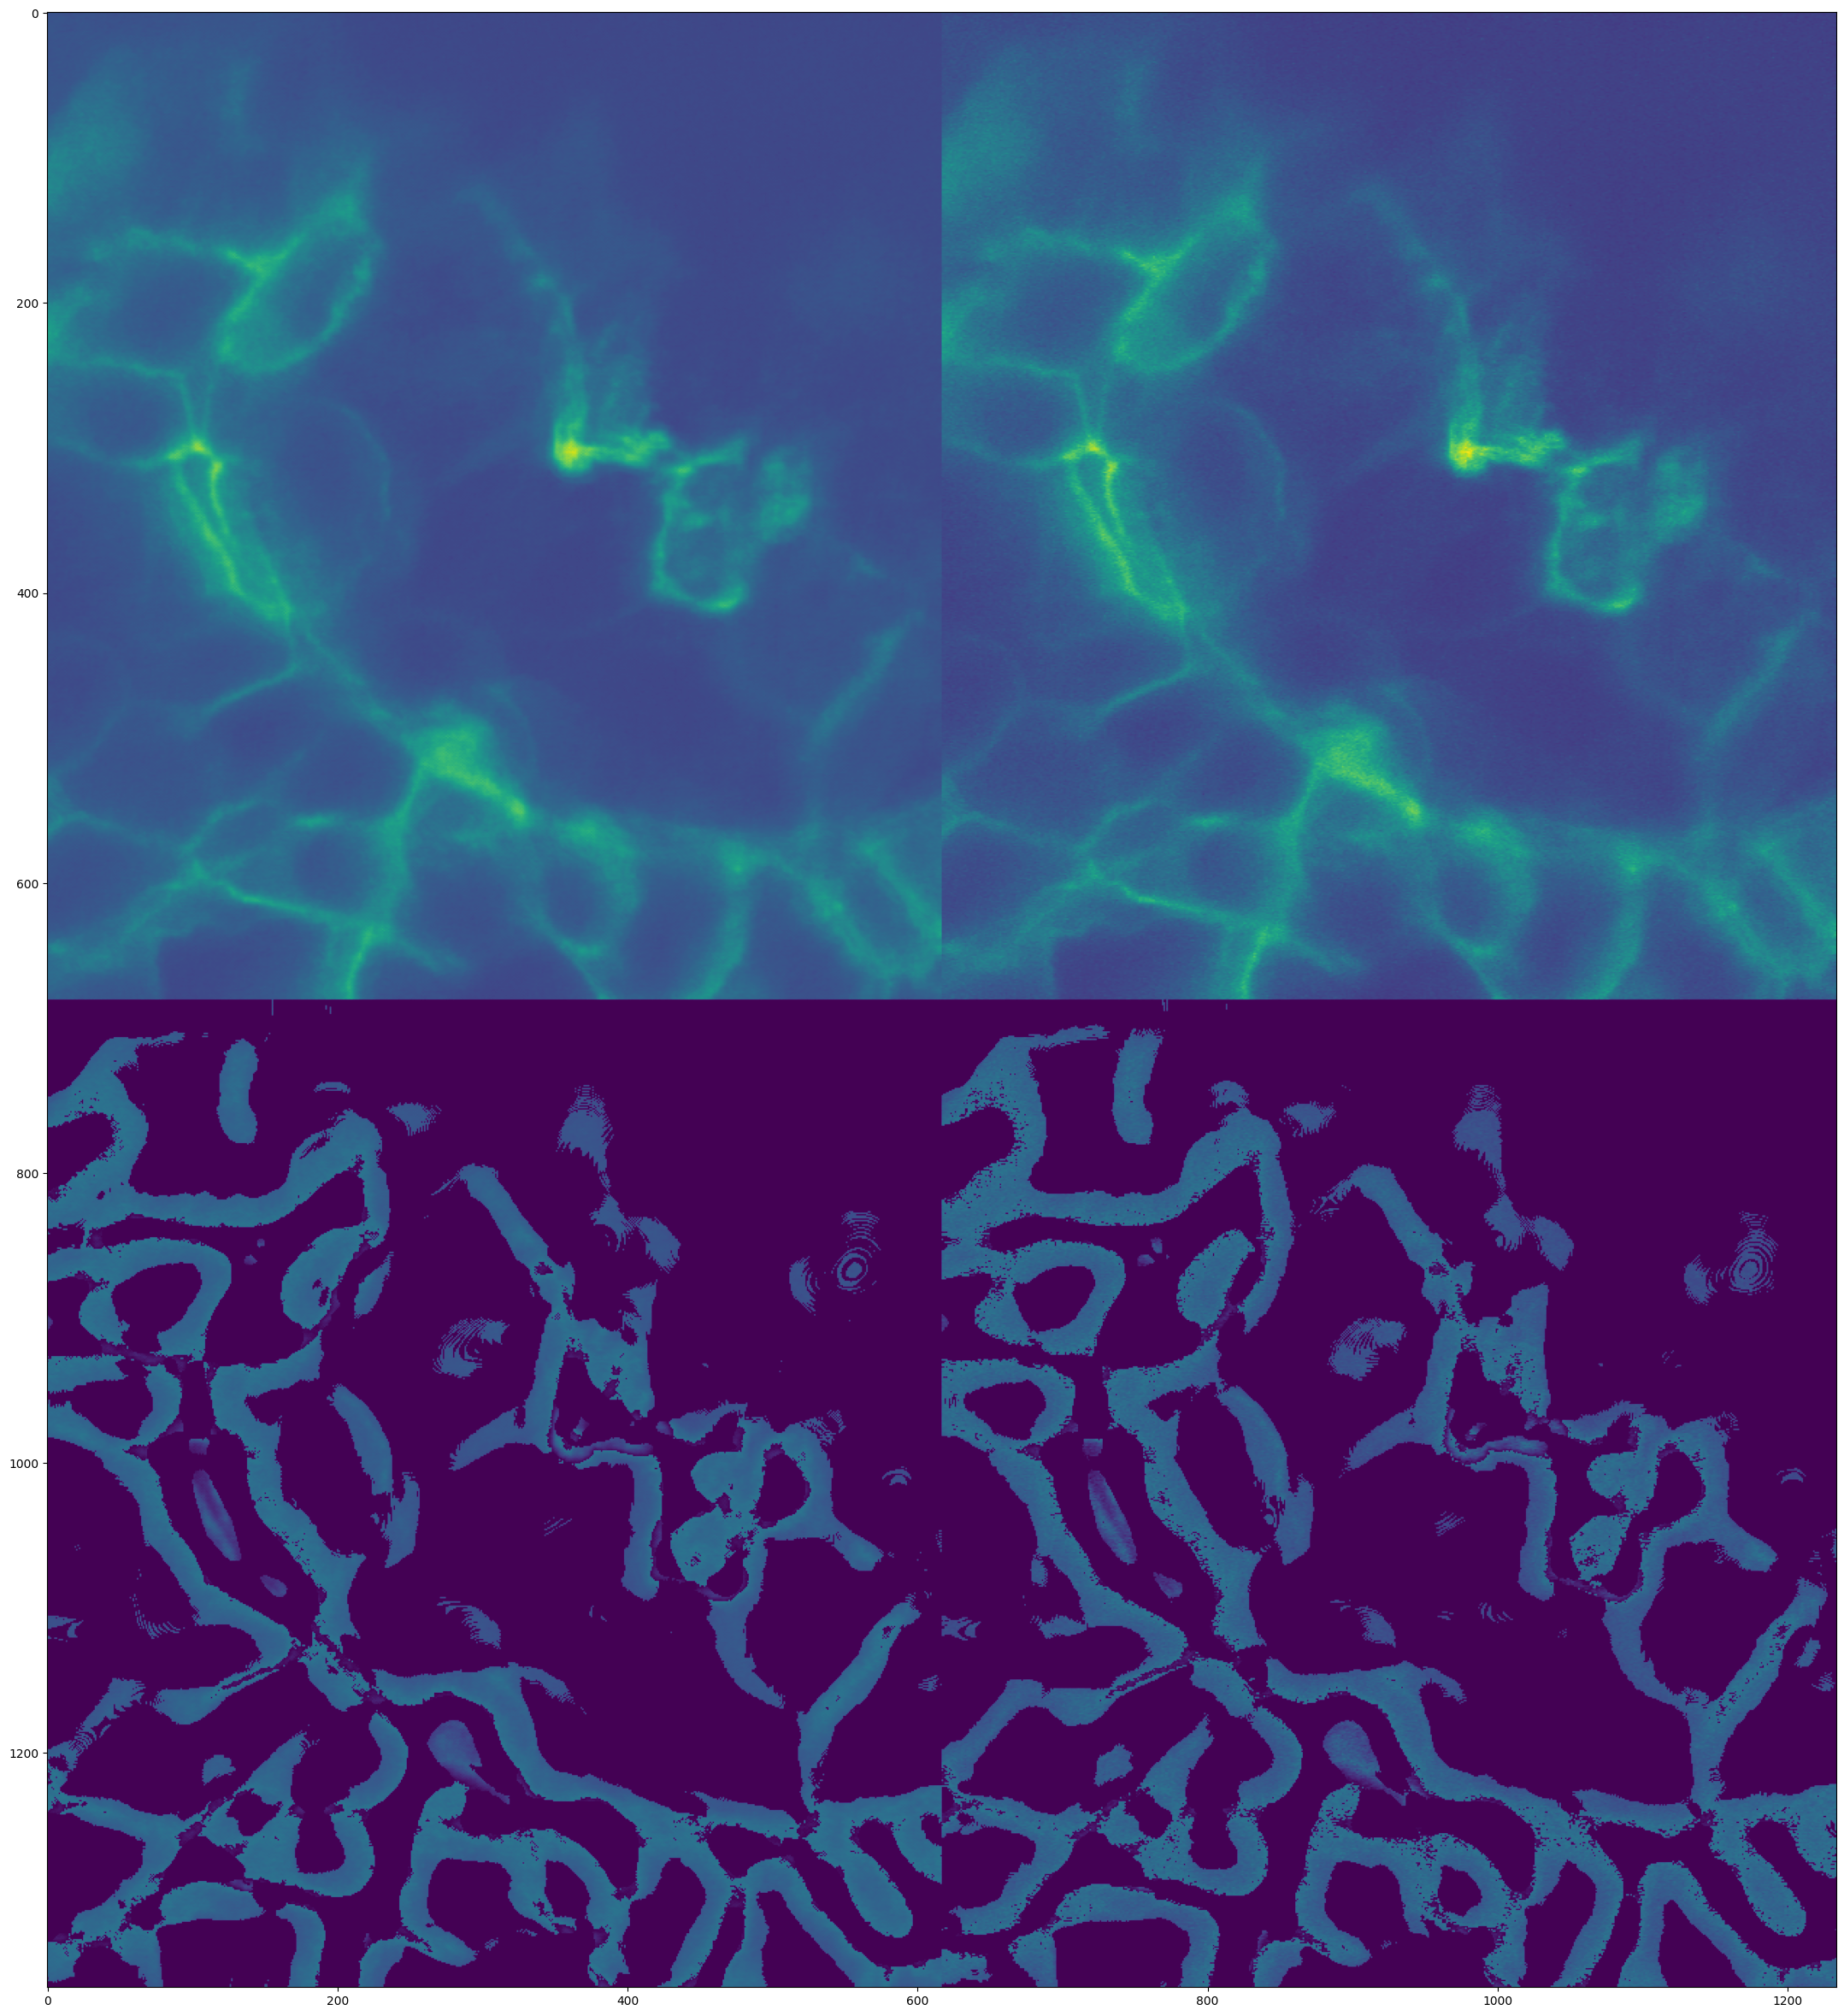

In [58]:
result_pred = np.where(th3_pred != 0, pred, 0)
result_im = np.where(th3_img != 0, img, 0)
plt.figure(figsize=(30,30))
upper_stack = np.hstack((pred_image.astype(np.uint16), image))
plt.imshow(np.vstack((upper_stack,np.hstack((result_pred, result_im)))))